<h1> Childrens Books Minimum Age Predictor By Description <h1>

<img src='storytelling-4203628_1920.jpg' width= '800' align="center">

<h2> “The more that you read, the more things you will know. The more you learn, the more places you’ll go.” - Dr. Seuss<h2>

So I've never really done Natural Language Processing before, but I'm a bookworm and I figured I should take the opportunity (since it's a Friday during COVID lockdown) to try some NLP on this interesting database I found on Kaggle. The database is composed of childrens books, divided into age groups, including a short description of each book.

In [41]:
#loading packages
import numpy as np 
import pandas as pd 
import re
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/a1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/a1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/a1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>Loading the data from a Kaggle database <h2>

In [10]:
df = pd.read_csv('children_stories.Csv', encoding="ISO-8859-1")
df

,names,cats,desc
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...
...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...
426,War and Peas,Age 8+,Nearly forty years after its original appearan...
427,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i..."
428,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...


<h2> Split the age ranges into min and max ages <h2>

Cite: https://www.kaggle.com/thomaskonstantin/children-books-age-range-prediction

In [11]:
def min_age(x):
    if x.find ('-') != -1:
        y = re.sub(' +', ' ', x)
        y = y.split(' ')[1]
        y = y.strip()
        return int(y.split('-')[0])
    else:
        if x.find('months'):
            return 0
        return int(x.replace('+','').split(' ')[1])
def max_age(x):
    if x.find ('-') != -1:
        y = re.sub(' +', ' ', x)
        y = y.split(' ')[1]
        y = y.strip()
        return int(x.split('-')[1])
    else:
        return 18

<h2>Preprocessing<h2>

In [12]:
df['min_age'] = df.cats.apply(min_age)
df['max_age'] = df.cats.apply(max_age)
df['age_range'] = df.max_age - df.min_age
df.loc[:,'desc'] = df.desc.apply(lambda x : " ".join(re.findall('[\w]+',x)))
df['avg_age'] = df.min_age + df.max_age / 2
df

,names,cats,desc,min_age,max_age,age_range,avg_age
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek No I...,2,9,7,6.5
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...,2,9,7,6.5
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...,2,9,7,6.5
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...,2,9,7,6.5
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...,2,9,7,6.5
...,...,...,...,...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...,0,18,18,9.0
426,War and Peas,Age 8+,Nearly forty years after its original appearan...,0,18,18,9.0
427,Love that Dog,Age 9-12,Jack has a great sadness in his life but he is...,9,12,3,15.0
428,A Pilgrim's Progress,Age 9+,I had a dream last night large enough to fill ...,0,18,18,9.0


<h2> Exploratory Data Analysis <h2>

In [62]:
fig = px.histogram(df, x="cats", title="Age Distribution",color_discrete_sequence=['purple'], labels={'cats':'age'})
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

In [63]:
fig = px.histogram(df, x="avg_age", nbins=6, color_discrete_sequence=['teal'], title="Average Age Distribution", labels={'cats':'age'})
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

(-0.5, 765.5, 265.5, -0.5)

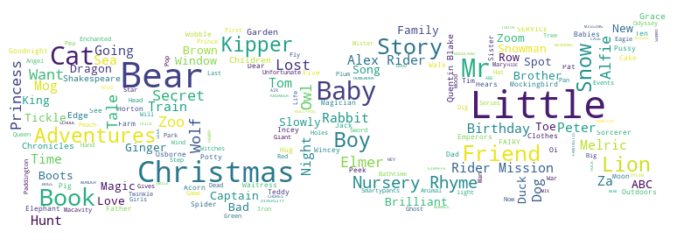

In [118]:
mask = np.array(Image.open('colorful-book-word-letters-white-background-35995907.jpg'))
wordcloud = WordCloud(background_color="white", mask=mask, width=mask.shape[1], height=mask.shape[0]).generate(' '.join(df['names']))
plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 419.5, 146.5, -0.5)

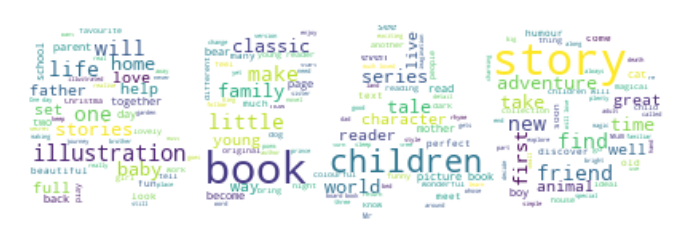

In [120]:
mask = np.array(Image.open('read-design-china-name.png'))
wordcloud = WordCloud(background_color="white", mask=mask, width=mask.shape[1], height=mask.shape[0]).generate(' '.join(df['desc']))
plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

<h2> Tokenization <h2>

In [124]:
X = df.desc.values
y = df.min_age.values
def tokenize(desc):
    
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(desc)
    lemmatizer = WordNetLemmatizer()

    filtered = [w for w in tokens if not w in stop_words]
    filtered = []
    for tok in tokens:
        if tok not in stop_words:
            clean_tok = lemmatizer.lemmatize(tok).lower().strip()
            filtered.append(clean_tok)
   
    print(filtered[:5])
    return filtered

<h2> Machine learning <h2>

In [125]:
def display_results(y_test, y_pred):
    accuracy = (y_pred == y_test).mean()

    print("Accuracy:", accuracy)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()
    
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)
    
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)

['first', 'met', 'wombles', '40', 'year']
['eris', 'goddess', 'discord', 'grumpy', 'invited']
['pleasure', 'parent', 'child', 'activity', 'like']
['want', 'friend', 'asked', 'simple', 'question']
['inclusive', 'isnâ', 'featuring', 'disabled', 'character']
['ancient', 'arabic', 'land', 'magic', 'commonplace']
['eric', 'carle', 'return', 'toddler', 'bookshelf']
['gentle', 'beautiful', 'picture', 'book', 'three']
['ad', '117ad', 'ninth', 'legion', 'marched']
['abe', 'real', 'service', 'dog', 'dedicated']
['baby', 'elephant', 'loses', 'teddy', 'sleep']
['helping', 'sort', 'old', 'toy', 'artifact']
['welcome', 'republication', 'thirty', 'year', 'old']
['little', 'princess', 'hate', 'nappy', 'think']
['first', 'story', 'much', 'loved', 'character']
['marigold', 'â', 'illustrated', 'mumâ', 'title']
['shirley', 'hughes', 'much', 'loved', 'alfie']
['set', '1947', 'story', 'open', '12']
['exceptional', 'conclusion', 'trilogy', 'pullman', 'effectively']
['action', 'accompany', 'verse', 'demonstra

In [424]:
display_results(y_test, y_pred)

Accuracy: 0.75


<h2> Conclusion <h2>

So after lots of playing around with NLP, the best result was achieved from the NLP functions in Udacity's Data Science program I'm currently studying. I was able to achieve about 75 percent accuracy when predicting the minimum age rating of a children's book by its description. Food for thought- can this be generalized even further? To be determined